# IPL-Data-Analysis

In [1]:
project_name = "ipl-data-analysis"

In [5]:
!pip install chart_studio

                                              0.0/64.4 kB ? eta -:--:--
     ---------------------------------------- 64.4/64.4 kB 1.7 MB/s eta 0:00:00


In [14]:
!pip install cufflinks

                                              0.0/81.7 kB ? eta -:--:--
     ---------------------------------------- 81.7/81.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68725 sha256=5f9ecfb7d1be586c03c62b448e06e05ad902eb67e1ba4a98202f10a4c794d23d
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\c3\bf\8f\afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfully built cufflinks


In [15]:
import chart_studio

In [16]:
import cufflinks

C:\Users\hp\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [17]:
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objs as go

In [25]:
# Loading the dataset
matches = pd.read_csv(r"C:\Users\hp\Downloads\matches.csv-20231125T060039Z-001\matches.csv",encoding = "utf-8")
deliveries = pd.read_csv(r"C:\Users\hp\Downloads\deliveries.csv-20231125T055929Z-001\deliveries.csv",encoding = "utf-8")

In [26]:
matches.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [27]:
matches.shape

(756, 18)

In [28]:
deliveries.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [29]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [30]:
teams = {'Sunrisers Hyderabad':'SRH', 'Mumbai Indians':'MI', 'Gujarat Lions':'GL',
       'Rising Pune Supergiant':'RPS', 'Royal Challengers Bangalore':'RCB',
       'Kolkata Knight Riders':'KKR', 'Delhi Daredevils':'DC', 'Kings XI Punjab':'KXIP',
       'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR', 'Deccan Chargers':'SRH',
       'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW', 'Rising Pune Supergiants':'RPS',
       'Delhi Capitals':'DC'}

In [31]:
##Since Delhi Daredevils changed their name to Delhi Capitals and Deccan Chargers changed their name to Sunrisers Hyderabad, I have used the abbreviations of their current names i.e., DC (Delhi Capitals) and SRH (Sunrisers Hyderabad).

In [32]:
# Mapping the abbreviated team names
matches['team1'] = matches['team1'].map(teams)
matches['team2'] = matches['team2'].map(teams)
matches['toss_winner'] = matches['toss_winner'].map(teams)
matches['winner'] = matches['winner'].map(teams)

In [33]:
matches.head()

id  season       city        date team1 team2 toss_winner toss_decision  \
0   1    2017  Hyderabad  2017-04-05   SRH   RCB         RCB         field   
1   2    2017       Pune  2017-04-06    MI   RPS         RPS         field   
2   3    2017     Rajkot  2017-04-07    GL   KKR         KKR         field   
3   4    2017     Indore  2017-04-08   RPS  KXIP        KXIP         field   
4   5    2017  Bangalore  2017-04-08   RCB    DC         RCB           bat   

   result  dl_applied winner  win_by_runs  win_by_wickets player_of_match  \
0  normal           0    SRH           35               0    Yuvraj Singh   
1  normal           0    RPS            0               7       SPD Smith   
2  normal           0    KKR            0              10         CA Lynn   
3  normal           0   KXIP            0               6      GJ Maxwell   
4  normal           0    RCB           15               0       KM Jadhav   

                                       venue         umpire1        umpire2  \
0  Rajiv Gandhi International Stadium, Uppal     AY Dandekar       NJ Llong   
1    Maharashtra Cricket Association Stadium  A Nand Kishore         S Ravi   
2     Saurashtra Cricket Association Stadium     Nitin Menon      CK Nandan   
3                     Holkar Cricket Stadium    AK Chaudhary  C Shamshuddin   
4                      M Chinnaswamy Stadium             NaN            NaN   

  umpire3  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [34]:
deliveries['batting_team'] = deliveries['batting_team'].map(teams)
deliveries['bowling_team'] = deliveries['bowling_team'].map(teams)

In [35]:
deliveries.head()

match_id  inning batting_team bowling_team  over  ball    batsman  \
0         1       1          SRH          RCB     1     1  DA Warner   
1         1       1          SRH          RCB     1     2  DA Warner   
2         1       1          SRH          RCB     1     3  DA Warner   
3         1       1          SRH          RCB     1     4  DA Warner   
4         1       1          SRH          RCB     1     5  DA Warner   

  non_striker    bowler  is_super_over  ...  bye_runs  legbye_runs  \
0    S Dhawan  TS Mills              0  ...         0            0   
1    S Dhawan  TS Mills              0  ...         0            0   
2    S Dhawan  TS Mills              0  ...         0            0   
3    S Dhawan  TS Mills              0  ...         0            0   
4    S Dhawan  TS Mills              0  ...         0            0   

   noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
0            0             0             0           0           0   
1            0             0             0           0           0   
2            0             0             4           0           4   
3            0             0             0           0           0   
4            0             0             0           2           2   

   player_dismissed dismissal_kind fielder  
0               NaN            NaN     NaN  
1               NaN            NaN     NaN  
2               NaN            NaN     NaN  
3               NaN            NaN     NaN  
4               NaN            NaN     NaN  

[5 rows x 21 columns]

# Basic Analysis of IPL Matches

### 1. Outcome of the match

In [41]:
# Kind of result
matches['result'].value_counts().iplot(kind='bar',xTitle='Result', yTitle='Count', title = 'Result Type');

#### From the above analysis we can see that only 4 out of 756 matches resulted in no outcome while only 9 matches ended up in a tie and rest of the matches had definite winners.

In [43]:
# Information about the matches which tied
matches[matches['result']=='tie']

id  season       city        date team1 team2 toss_winner  \
33      34    2017     Rajkot  2017-04-29    GL    MI          GL   
125    126    2009  Cape Town  2009-04-23    RR   KKR         KKR   
189    190    2010    Chennai  2010-03-21  KXIP   CSK         CSK   
387    388    2013  Hyderabad  2013-04-07   RCB   SRH         RCB   
400    401    2013  Bangalore  2013-04-16    DC   RCB         RCB   
475    476    2014  Abu Dhabi  2014-04-29    RR   KKR          RR   
535    536    2015  Ahmedabad  2015-04-21    RR  KXIP        KXIP   
705  11146    2019      Delhi    30/03/19   KKR    DC          DC   
746  11342    2019     Mumbai    02/05/19    MI   SRH          MI   

    toss_decision result  dl_applied winner  win_by_runs  win_by_wickets  \
33            bat    tie           0     MI            0               0   
125         field    tie           0     RR            0               0   
189         field    tie           0   KXIP            0               0   
387           bat    tie           0    SRH            0               0   
400         field    tie           0    RCB            0               0   
475           bat    tie           0     RR            0               0   
535         field    tie           0   KXIP            0               0   
705         field    tie           0     DC            0               0   
746           bat    tie           0     MI            0               0   

    player_of_match                                      venue        umpire1  \
33        KH Pandya     Saurashtra Cricket Association Stadium   AK Chaudhary   
125       YK Pathan                                   Newlands      MR Benson   
189        J Theron            MA Chidambaram Stadium, Chepauk    K Hariharan   
387       GH Vihari  Rajiv Gandhi International Stadium, Uppal   AK Chaudhary   
400         V Kohli                      M Chinnaswamy Stadium      M Erasmus   
475     JP Faulkner                       Sheikh Zayed Stadium      Aleem Dar   
535        SE Marsh               Sardar Patel Stadium, Motera      M Erasmus   
705          P Shaw                    Feroz Shah Kotla Ground  Anil Dandekar   
746       JJ Bumrah                           Wankhede Stadium         S Ravi   

          umpire2         umpire3  
33    CB Gaffaney             NaN  
125     M Erasmus             NaN  
189     DJ Harper             NaN  
387        S Ravi             NaN  
400   VA Kulkarni             NaN  
475  AK Chaudhary             NaN  
535        S Ravi             NaN  
705   Nitin Menon  Marais Erasmus  
746      O Nandan   Nanda Kishore

In [44]:
# Information about the matches which had no results
matches[matches['result']=='no result']

id  season       city        date team1 team2 toss_winner  \
300    301    2011      Delhi  2011-05-21    DC    PW          DC   
545    546    2015  Bangalore  2015-04-29   RCB    RR          RR   
570    571    2015  Bangalore  2015-05-17    DC   RCB         RCB   
744  11340    2019  Bengaluru    30/04/19   RCB    RR          RR   

    toss_decision     result  dl_applied winner  win_by_runs  win_by_wickets  \
300           bat  no result           0    NaN            0               0   
545         field  no result           0    NaN            0               0   
570         field  no result           0    NaN            0               0   
744         field  no result           0    NaN            0               0   

    player_of_match                   venue          umpire1       umpire2  \
300             NaN        Feroz Shah Kotla        SS Hazare     RJ Tucker   
545             NaN   M Chinnaswamy Stadium        JD Cloete     PG Pathak   
570             NaN   M Chinnaswamy Stadium  HDPK Dharmasena  K Srinivasan   
744             NaN  M. Chinnaswamy Stadium      Nigel Llong  Ulhas Gandhe   

            umpire3  
300             NaN  
545             NaN  
570             NaN  
744  Anil Chaudhary

## 2. Win & Loss Analysis

In [46]:
winloss = matches[['team1','team2','winner']]
winloss.head()

team1 team2 winner
0   SRH   RCB    SRH
1    MI   RPS    RPS
2    GL   KKR    KKR
3   RPS  KXIP   KXIP
4   RCB    DC    RCB

In [47]:
winloss['loser'] = winloss.apply(lambda x: x['team2'] if x['team1']== x['winner'] else x['team1'], axis = 1)

In [48]:
winloss.head()

team1 team2 winner loser
0   SRH   RCB    SRH   RCB
1    MI   RPS    RPS    MI
2    GL   KKR    KKR    GL
3   RPS  KXIP   KXIP   RPS
4   RCB    DC    RCB    DC

##### Number of wins per team

In [50]:
teamwins = winloss['winner'].value_counts()
teamwins

MI      109
CSK     100
KKR      92
SRH      87
RCB      84
KXIP     82
DC       77
RR       75
RPS      15
GL       13
PW       12
KTK       6
Name: winner, dtype: int64

In [51]:
teamwins.iplot(kind='bar', xTitle = 'Team', yTitle = 'Count', title = 'Winning Count');

 ##### From the above graph we can conclude that Mumbai Indians have won the most number of matches followed by Chennai Super Kings and Kolkata Knight Riders.

## Number of losses per team

In [53]:
teamloss = winloss['loser'].value_counts()
teamloss

DC      100
SRH      96
RCB      95
KXIP     94
KKR      86
MI       78
RR       70
CSK      64
PW       33
GL       17
RPS      15
KTK       8
Name: loser, dtype: int64

In [54]:
teamloss.iplot(kind='bar', xTitle='Teams',yTitle='Count',title = 'Matches lost');

## 3. %Win and %Loss

In [56]:
played = (matches['team1'].value_counts() + matches['team2'].value_counts()).reset_index()
played.columns = ['team','played']
played

team  played
0    CSK     164
1     DC     177
2     GL      30
3    KKR     178
4    KTK      14
5   KXIP     176
6     MI     187
7     PW      46
8    RCB     180
9    RPS      30
10    RR     147
11   SRH     183

In [57]:
wins = matches['winner'].value_counts().reset_index()
wins.columns = ['team','won']
wins

team  won
0     MI  109
1    CSK  100
2    KKR   92
3    SRH   87
4    RCB   84
5   KXIP   82
6     DC   77
7     RR   75
8    RPS   15
9     GL   13
10    PW   12
11   KTK    6

In [58]:
played = played.merge(wins, left_on='team', right_on='team', how='inner')
played

team  played  won
0    CSK     164  100
1     DC     177   77
2     GL      30   13
3    KKR     178   92
4    KTK      14    6
5   KXIP     176   82
6     MI     187  109
7     PW      46   12
8    RCB     180   84
9    RPS      30   15
10    RR     147   75
11   SRH     183   87

In [59]:
loss = winloss['loser'].value_counts().reset_index()
loss.columns = ['team','lost']
loss

team  lost
0     DC   100
1    SRH    96
2    RCB    95
3   KXIP    94
4    KKR    86
5     MI    78
6     RR    70
7    CSK    64
8     PW    33
9     GL    17
10   RPS    15
11   KTK     8

In [60]:
played = played.merge(loss, left_on = 'team', right_on = 'team', how='inner')
played

team  played  won  lost
0    CSK     164  100    64
1     DC     177   77   100
2     GL      30   13    17
3    KKR     178   92    86
4    KTK      14    6     8
5   KXIP     176   82    94
6     MI     187  109    78
7     PW      46   12    33
8    RCB     180   84    95
9    RPS      30   15    15
10    RR     147   75    70
11   SRH     183   87    96

In [61]:
trace1 = go.Bar(x=played['team'], y=played['played'], name='Matches Played')
trace2 = go.Bar(x=played['team'], y=played['won'], name='Matches Won')
data = [trace1, trace2]
iplot(data)

In [62]:
played['%win'] = round((played['won'] / played['played'])*100,2)
played['%loss'] = round((played['lost'] / played['played']) * 100,2)
played = played.sort_values(by='%win',ascending=False)
played

team  played  won  lost   %win  %loss
0    CSK     164  100    64  60.98  39.02
6     MI     187  109    78  58.29  41.71
3    KKR     178   92    86  51.69  48.31
10    RR     147   75    70  51.02  47.62
9    RPS      30   15    15  50.00  50.00
11   SRH     183   87    96  47.54  52.46
8    RCB     180   84    95  46.67  52.78
5   KXIP     176   82    94  46.59  53.41
1     DC     177   77   100  43.50  56.50
2     GL      30   13    17  43.33  56.67
4    KTK      14    6     8  42.86  57.14
7     PW      46   12    33  26.09  71.74

#### %win of each team

In [63]:
played['%win'].iplot(kind='bar', xTitle='Teams',yTitle='Win %', title='Win Percentage of Each Team');

### 4. City Wise Analysis

In [64]:
# Which city hosted the most number of matches
city = matches['city'].value_counts()
city

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

## Analyzing Toss

In [66]:
tosswins = matches['toss_winner'].value_counts()
tosswins

MI      98
KKR     92
DC      90
SRH     89
CSK     89
RCB     81
KXIP    81
RR      80
PW      20
GL      15
RPS     13
KTK      8
Name: toss_winner, dtype: int64

In [67]:
tosswins.iplot(kind='bar',xTitle='Team',yTitle='Count',title='Number of Toss Wins');

## Prefered Toss decision per season

In [68]:
tossdec = matches.groupby('season')['toss_decision'].value_counts()
tossdec = pd.DataFrame(tossdec)
tossdec.columns = ['Count']
tossdec.reset_index(inplace=True)
tossdec.set_index('season',inplace=True)
tossdec

toss_decision  Count
season                     
2008           field     32
2008             bat     26
2009             bat     35
2009           field     22
2010             bat     39
2010           field     21
2011           field     48
2011             bat     25
2012             bat     37
2012           field     37
2013             bat     45
2013           field     31
2014           field     41
2014             bat     19
2015           field     34
2015             bat     25
2016           field     49
2016             bat     11
2017           field     48
2017             bat     11
2018           field     50
2018             bat     10
2019           field     50
2019             bat     10

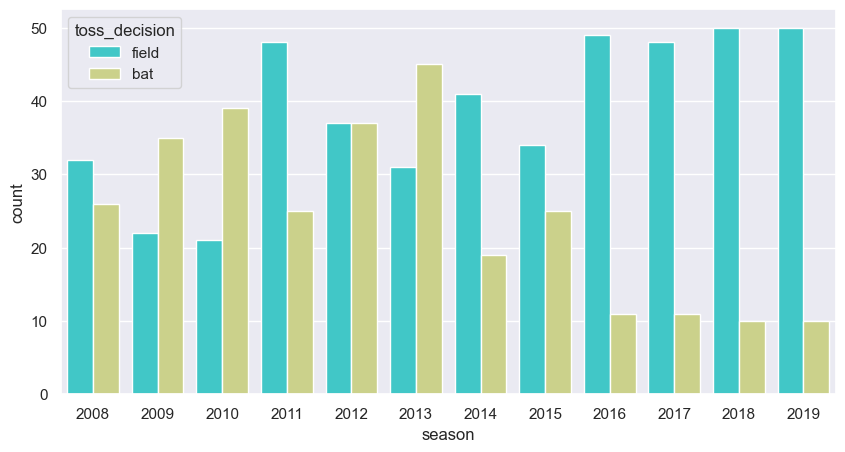

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(x='season',hue='toss_decision',data=matches, palette='rainbow');

## Season wise match summary

In [70]:
matches['season'].value_counts().iplot(kind='bar',xTitle='season',yTitle='Count',title='Number of Matches Per Season')

### Runs across the season

In [71]:
df = matches[['id','season']].merge(deliveries, left_on='id', right_on='match_id',how='left')
df.drop('id',axis=1,inplace=True)
df.head(2)

season  match_id  inning batting_team bowling_team  over  ball    batsman  \
0    2017         1       1          SRH          RCB     1     1  DA Warner   
1    2017         1       1          SRH          RCB     1     2  DA Warner   

  non_striker    bowler  ...  bye_runs  legbye_runs  noball_runs  \
0    S Dhawan  TS Mills  ...         0            0            0   
1    S Dhawan  TS Mills  ...         0            0            0   

   penalty_runs  batsman_runs  extra_runs  total_runs  player_dismissed  \
0             0             0           0           0               NaN   
1             0             0           0           0               NaN   

   dismissal_kind fielder  
0             NaN     NaN  
1             NaN     NaN  

[2 rows x 22 columns]

In [72]:
seasonruns = df.groupby('season')['total_runs'].sum().reset_index()
seasonruns.set_index('season',inplace=True)

In [73]:
seasonruns

total_runs
season            
2008         17937
2009         16353
2010         18883
2011         21154
2012         22453
2013         22602
2014         18931
2015         18353
2016         18862
2017         18786
2018         20706
2019         20270

In [74]:
seasonruns.iplot()

In [75]:
seasonruns = seasonruns.reset_index()
no_of_matches = list(matches.groupby('season')['id'].count())
seasonruns['matches'] = no_of_matches

In [76]:
seasonruns

season  total_runs  matches
0     2008       17937       58
1     2009       16353       57
2     2010       18883       60
3     2011       21154       73
4     2012       22453       74
5     2013       22602       76
6     2014       18931       60
7     2015       18353       59
8     2016       18862       60
9     2017       18786       59
10    2018       20706       60
11    2019       20270       60

In [77]:
seasonruns['runs_per_match'] = round(seasonruns['total_runs'] / seasonruns['matches'])
seasonruns

season  total_runs  matches  runs_per_match
0     2008       17937       58           309.0
1     2009       16353       57           287.0
2     2010       18883       60           315.0
3     2011       21154       73           290.0
4     2012       22453       74           303.0
5     2013       22602       76           297.0
6     2014       18931       60           316.0
7     2015       18353       59           311.0
8     2016       18862       60           314.0
9     2017       18786       59           318.0
10    2018       20706       60           345.0
11    2019       20270       60           338.0

In [78]:
seasonruns.set_index('season',inplace=True)
seasonruns['runs_per_match'].iplot()


### Win by highest margin

In [79]:
# Win by runs
matches[matches['win_by_runs'] == matches['win_by_runs'].max()]

id  season   city        date team1 team2 toss_winner toss_decision  \
43  44    2017  Delhi  2017-05-06    MI    DC          DC         field   

    result  dl_applied winner  win_by_runs  win_by_wickets player_of_match  \
43  normal           0     MI          146               0     LMP Simmons   

               venue      umpire1    umpire2 umpire3  
43  Feroz Shah Kotla  Nitin Menon  CK Nandan     NaN

In [80]:
# Win by wickets
matches[matches['win_by_wickets'] == matches['win_by_wickets'].max()]

id  season        city        date team1 team2 toss_winner  \
2       3    2017      Rajkot  2017-04-07    GL   KKR         KKR   
34     35    2017  Chandigarh  2017-04-30    DC  KXIP        KXIP   
71     72    2008      Mumbai  2008-04-27    MI   SRH         SRH   
119   120    2009   Cape Town  2009-04-19  KXIP    DC          DC   
183   184    2010   Bangalore  2010-03-18    RR   RCB         RCB   
298   299    2011      Mumbai  2011-05-20    MI    RR          MI   
376   377    2012      Jaipur  2012-05-20    RR    MI          RR   
390   391    2013  Chandigarh  2013-04-10  KXIP   CSK         CSK   
542   543    2015       Delhi  2015-04-26    DC   RCB         RCB   
590   591    2016      Rajkot  2016-04-21    GL   SRH         SRH   
683  7941    2018      Indore    14/05/18  KXIP   RCB         RCB   

    toss_decision  result  dl_applied winner  win_by_runs  win_by_wickets  \
2           field  normal           0    KKR            0              10   
34          field  normal           0   KXIP            0              10   
71          field  normal           0    SRH            0              10   
119         field  normal           1     DC            0              10   
183         field  normal           0    RCB            0              10   
298           bat  normal           0     RR            0              10   
376           bat  normal           0     MI            0              10   
390         field  normal           0    CSK            0              10   
542         field  normal           0    RCB            0              10   
590         field  normal           0    SRH            0              10   
683         field  normal           0    RCB            0              10   

    player_of_match                                              venue  \
2           CA Lynn             Saurashtra Cricket Association Stadium   
34   Sandeep Sharma  Punjab Cricket Association IS Bindra Stadium, ...   
71     AC Gilchrist                         Dr DY Patil Sports Academy   
119      DL Vettori                                           Newlands   
183       JH Kallis                              M Chinnaswamy Stadium   
298       SR Watson                                   Wankhede Stadium   
376        DR Smith                             Sawai Mansingh Stadium   
390      MEK Hussey         Punjab Cricket Association Stadium, Mohali   
542        VR Aaron                                   Feroz Shah Kotla   
590         B Kumar             Saurashtra Cricket Association Stadium   
683        UT Yadav                             Holkar Cricket Stadium   

             umpire1                umpire2   umpire3  
2        Nitin Menon              CK Nandan       NaN  
34          YC Barde              CK Nandan       NaN  
71         Asad Rauf             SL Shastri       NaN  
119        MR Benson              SD Ranade       NaN  
183      K Hariharan              DJ Harper       NaN  
298      RE Koertzen             PR Reiffel       NaN  
376  HDPK Dharmasena          C Shamshuddin       NaN  
390        Aleem Dar          C Shamshuddin       NaN  
542        M Erasmus                 S Ravi       NaN  
590       K Bharatan        HDPK Dharmasena       NaN  
683   Bruce Oxenford  Virender Kumar Sharma  O Nandan

In [81]:
# By Runs
matches.groupby('season')[['win_by_runs']].max().iplot(kind='bar');

### Score Distribution of Each Team by Innings

In [82]:
runs = deliveries.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
runs

match_id  inning batting_team  total_runs
0            1       1          SRH         207
1            1       2          RCB         172
2            2       1           MI         184
3            2       2          RPS         187
4            3       1           GL         183
...        ...     ...          ...         ...
1523     11413       2           DC         170
1524     11414       1           DC         155
1525     11414       2          CSK         162
1526     11415       1           MI         152
1527     11415       2          CSK         157

[1528 rows x 4 columns]

In [83]:
runs.drop('match_id',axis=1,inplace=True)

### For First Inning

In [84]:
innings1 = runs[runs['inning']==1]
innings1.drop('inning',axis=1,inplace=True)
innings1

batting_team  total_runs
0             SRH         207
2              MI         184
4              GL         183
6             RPS         163
8             RCB         157
...           ...         ...
1518          KKR         143
1520          CSK         136
1522          SRH         171
1524           DC         155
1526           MI         152

[756 rows x 2 columns]

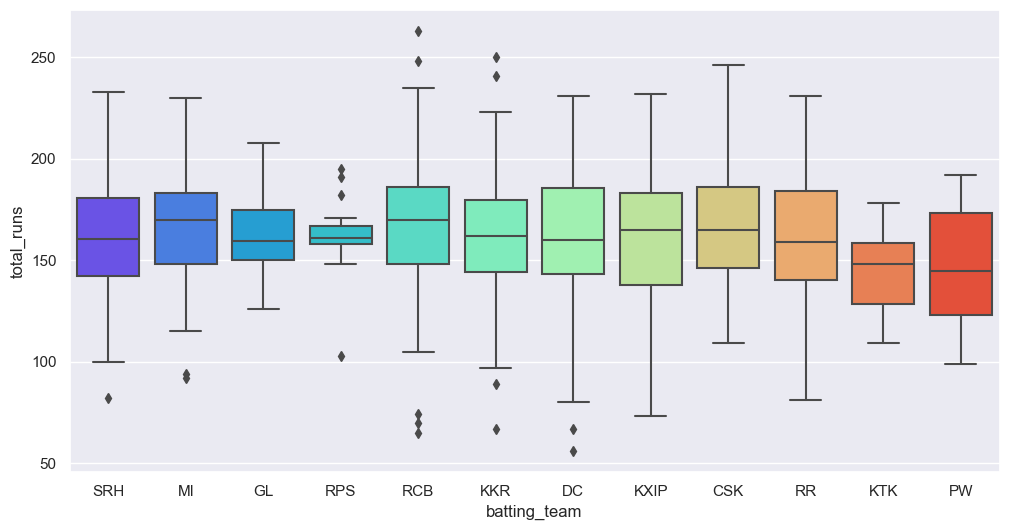

In [85]:
plt.figure(figsize=(12,6))
sns.boxplot(x='batting_team',y='total_runs',data=innings1, palette='rainbow');

### For 2nd Inning

In [86]:
innings2 = runs[runs['inning']==2]
innings2.drop('inning',axis=1,inplace=True)
innings2

batting_team  total_runs
1             RCB         172
3             RPS         187
5             KKR         184
7            KXIP         164
9              DC         142
...           ...         ...
1519           MI         137
1521           MI         140
1523           DC         170
1525          CSK         162
1527          CSK         157

[754 rows x 2 columns]

<Axes: xlabel='batting_team', ylabel='total_runs'>

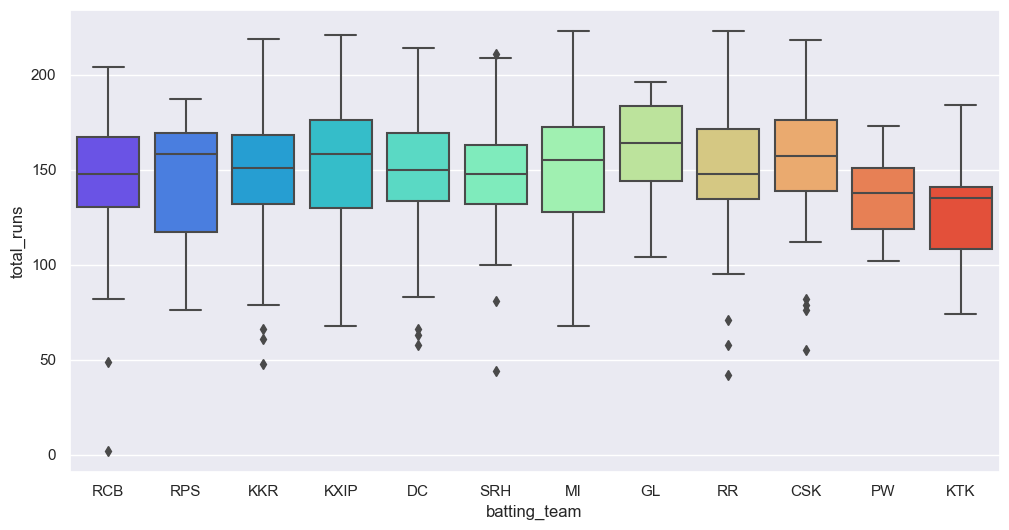

In [87]:
plt.figure(figsize=(12,6))
sns.boxplot(data=innings2, x='batting_team', y='total_runs', palette='rainbow')

##### Number of times scored or conceded above 200 runs by each team

In [88]:
scores = deliveries.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
scores

match_id  inning batting_team bowling_team  total_runs
0            1       1          SRH          RCB         207
1            1       2          RCB          SRH         172
2            2       1           MI          RPS         184
3            2       2          RPS           MI         187
4            3       1           GL          KKR         183
...        ...     ...          ...          ...         ...
1523     11413       2           DC          SRH         170
1524     11414       1           DC          CSK         155
1525     11414       2          CSK           DC         162
1526     11415       1           MI          CSK         152
1527     11415       2          CSK           MI         157

[1528 rows x 5 columns]

In [89]:
scored_200 = scores[scores['total_runs'] >= 200]
scored_200

match_id  inning batting_team bowling_team  total_runs
0            1       1          SRH          RCB         207
16           9       1           DC          RPS         205
38          20       1          RCB           GL         213
62          32       1          SRH         KXIP         207
72          36       1          SRH          KKR         209
...        ...     ...          ...          ...         ...
1475     11326       2          KKR          RCB         219
1488     11333       1          RCB         KXIP         213
1498     11338       1          KKR           MI         241
1499     11338       2           MI          KKR         204
1500     11339       1          SRH         KXIP         232

[105 rows x 5 columns]

In [90]:
# Scored above 200
scored_200['batting_team'].value_counts()

RCB     19
CSK     17
KXIP    15
MI      14
KKR     12
SRH     11
DC       8
RR       8
GL       1
Name: batting_team, dtype: int64

In [91]:
scored_200['batting_team'].value_counts().iplot(kind='bar', xTitle='Team',yTitle='Count',title='Scored 200 or above');

In [92]:
# Conceded 200 or avove
scored_200['bowling_team'].value_counts()

KXIP    21
RCB     15
DC      12
CSK     12
RR      12
KKR     10
SRH     10
MI       8
GL       3
RPS      1
PW       1
Name: bowling_team, dtype: int64

In [94]:
scored_200['bowling_team'].value_counts().iplot(kind='bar', xTitle='Teams',yTitle='Count', title='Conceded 200 or avove');

#### Comparing two teams

In [95]:
def comparison(team1,team2):
    compare = matches[((matches['team1']==team1) | (matches['team2']==team1)) & ((matches['team1']==team2) | (matches['team2']==team2))]
    return sns.countplot(x='season',hue='winner',data=compare)

<Axes: xlabel='season', ylabel='count'>

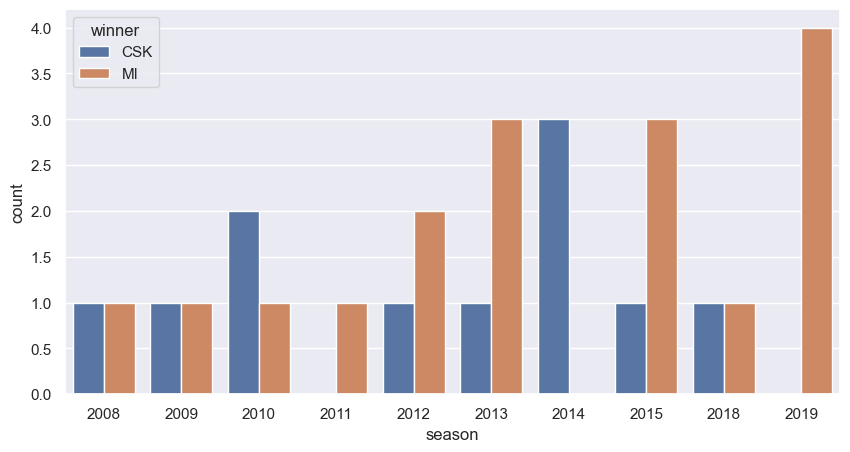

In [96]:
plt.figure(figsize=(10,5))
comparison('MI','CSK')

#### Wins at different venues

In [97]:
def lucky(matches,team):
    return matches[matches['winner']==team]['venue'].value_counts()

In [98]:
lucky(matches,'MI')[:10].iplot(kind='bar')

In [99]:
lucky(matches,'CSK')[0:10].iplot(kind='bar')

####  Head-to-Head Comparison of Two Teams

In [100]:
def geth2h(team1,team2):
    teams = ['MI','CSK']
    if team1 in teams and team2 in teams:
        return True
    else:
        return False

In [101]:
index=[]
for row in matches.iterrows():
    flag = geth2h(row[1]['team1'],row[1]['team2'])
    index.append(flag)

In [102]:
sum(index)

28

In [103]:
h2h = matches[index]

In [104]:
# Summary of all the matches played against each other
h2h

id  season            city        date team1 team2 toss_winner  \
66      67    2008         Chennai  2008-04-23   CSK    MI          MI   
95      96    2008          Mumbai  2008-05-14   CSK    MI          MI   
117    118    2009       Cape Town  2009-04-18    MI   CSK         CSK   
161    162    2009  Port Elizabeth  2009-05-16    MI   CSK          MI   
193    194    2010          Mumbai  2010-03-25   CSK    MI          MI   
210    211    2010         Chennai  2010-04-06   CSK    MI         CSK   
233    234    2010          Mumbai  2010-04-25   CSK    MI         CSK   
256    257    2011          Mumbai  2011-04-22    MI   CSK         CSK   
307    308    2012         Chennai  2012-04-04   CSK    MI          MI   
354    355    2012          Mumbai  2012-05-06   CSK    MI          MI   
378    379    2012       Bangalore  2012-05-23   CSK    MI          MI   
385    386    2013         Chennai  2013-04-06    MI   CSK          MI   
429    430    2013          Mumbai  2013-05-05    MI   CSK          MI   
453    454    2013           Delhi  2013-05-21   CSK    MI         CSK   
456    457    2013         Kolkata  2013-05-26    MI   CSK          MI   
469    470    2014             NaN  2014-04-25    MI   CSK          MI   
489    490    2014          Mumbai  2014-05-10    MI   CSK         CSK   
514    515    2014          Mumbai  2014-05-28    MI   CSK         CSK   
529    530    2015          Mumbai  2015-04-17    MI   CSK          MI   
558    559    2015         Chennai  2015-05-08   CSK    MI         CSK   
572    573    2015          Mumbai  2015-05-19    MI   CSK          MI   
575    576    2015         Kolkata  2015-05-24    MI   CSK         CSK   
636   7894    2018          Mumbai    07/04/18    MI   CSK         CSK   
662   7920    2018            Pune    28/04/18   CSK    MI          MI   
710  11151    2019          Mumbai    03/04/19    MI   CSK         CSK   
739  11335    2019         Chennai    26/04/19    MI   CSK         CSK   
752  11412    2019         Chennai    07/05/19   CSK    MI         CSK   
755  11415    2019       Hyderabad    12/05/19    MI   CSK          MI   

    toss_decision  result  dl_applied winner  win_by_runs  win_by_wickets  \
66          field  normal           0    CSK            6               0   
95          field  normal           0     MI            0               9   
117         field  normal           0     MI           19               0   
161           bat  normal           0    CSK            0               7   
193         field  normal           0     MI            0               5   
210           bat  normal           0    CSK           24               0   
233           bat  normal           0    CSK           22               0   
256         field  normal           0     MI            8               0   
307         field  normal           0     MI            0               8   
354         field  normal           0     MI            0               2   
378         field  normal           0    CSK           38               0   
385           bat  normal           0     MI            9               0   
429           bat  normal           0     MI           60               0   
453           bat  normal           0    CSK           48               0   
456           bat  normal           0     MI           23               0   
469           bat  normal           0    CSK            0               7   
489         field  normal           0    CSK            0               4   
514         field  normal           0    CSK            0               7   
529           bat  normal           0    CSK            0               6   
558           bat  normal           0     MI            0               6   
572           bat  normal           0     MI           25               0   
575         field  normal           0     MI           41               0   
636         field  normal           0    CSK            0               1   
662         f

### MI vs CSK Head-to-Head Match Results

In [105]:
h2h['winner'].value_counts().iplot(kind='bar');

##### MI vs CSK Head-to-Head Toss Victories

In [106]:
h2h['toss_winner'].value_counts().iplot(kind='bar');

##### MI vs CSK Toss Decision

In [107]:
h2h.groupby('toss_winner')['toss_decision'].value_counts().iplot(kind='bar');

#### MI vs CSK Most Player of the Match Awards

In [108]:
h2h['player_of_match'].value_counts().iplot(kind='bar');

In [109]:
winmargin = h2h[['winner','win_by_runs','win_by_wickets']]
winmargin.set_index('winner',inplace=True)
winmargin.head()

win_by_runs  win_by_wickets
winner                             
CSK               6               0
MI                0               9
MI               19               0
CSK               0               7
MI                0               5

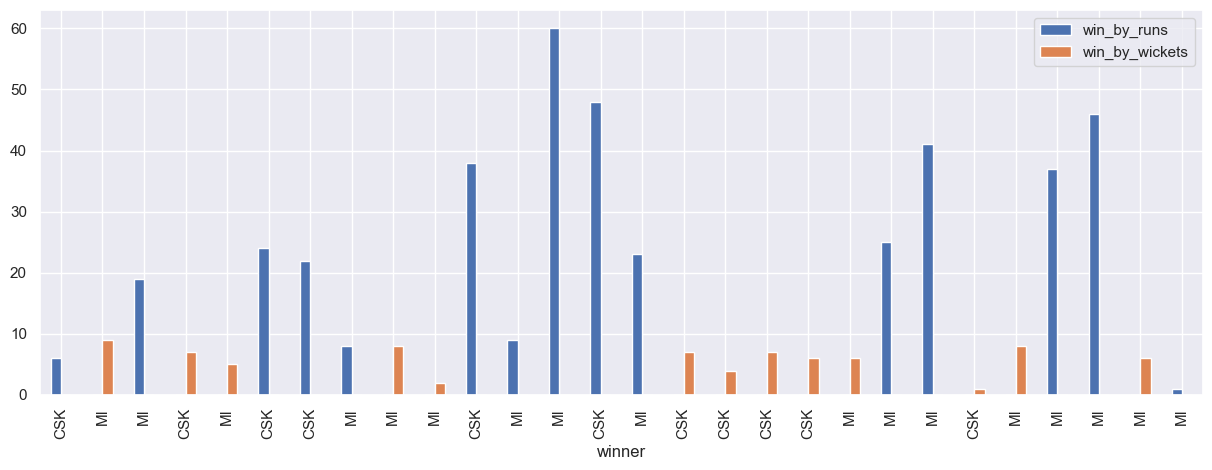

In [110]:
winmargin.plot.bar(figsize=(15,5));

#### Most Player of the Match Award Winner

In [111]:
matches['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

In [113]:
# Top 20 most Player of the Match Award Winners

In [114]:
matches['player_of_match'].value_counts()[:20].iplot(kind='bar')

In [115]:
runscorer = deliveries.groupby('batsman')['batsman_runs'].sum()

In [116]:
runscorer = runscorer.sort_values(ascending=False)

In [117]:
# Top 20 highest run getters
runscorer[:20].iplot(kind='bar');

In [118]:
deliveries.head(1)

match_id  inning batting_team bowling_team  over  ball    batsman  \
0         1       1          SRH          RCB     1     1  DA Warner   

  non_striker    bowler  is_super_over  ...  bye_runs  legbye_runs  \
0    S Dhawan  TS Mills              0  ...         0            0   

   noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
0            0             0             0           0           0   

   player_dismissed dismissal_kind fielder  
0               NaN            NaN     NaN  

[1 rows x 21 columns]

In [119]:
deliveries['batsman'].value_counts()[:20].iplot(kind='bar');


In [120]:
deliveries['non_striker'].value_counts()[0:20].iplot(kind='bar');

In [122]:
sixes = deliveries[deliveries['batsman_runs']==6]
sixes.head()

match_id  inning batting_team bowling_team  over  ball       batsman  \
10         1       1          SRH          RCB     2     4     DA Warner   
47         1       1          SRH          RCB     8     4  MC Henriques   
75         1       1          SRH          RCB    13     2  Yuvraj Singh   
89         1       1          SRH          RCB    15     3  Yuvraj Singh   
91         1       1          SRH          RCB    15     5  MC Henriques   

     non_striker       bowler  is_super_over  ...  bye_runs  legbye_runs  \
10      S Dhawan  A Choudhary              0  ...         0            0   
47      S Dhawan      TM Head              0  ...         0            0   
75  MC Henriques  A Choudhary              0  ...         0            0   
89  MC Henriques    S Aravind              0  ...         0            0   
91  Yuvraj Singh    S Aravind              0  ...         0            0   

    noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
10            0             0             6           0           6   
47            0             0             6           0           6   
75            0             0             6           0           6   
89            0             0             6           0           6   
91            0             0             6           0           6   

    player_dismissed dismissal_kind fielder  
10               NaN            NaN     NaN  
47               NaN            NaN     NaN  
75               NaN            NaN     NaN  
89               NaN            NaN     NaN  
91               NaN            NaN     NaN  

[5 rows x 21 columns]

In [124]:
fours = deliveries[deliveries['batsman_runs']==4]
fours.head()

match_id  inning batting_team bowling_team  over  ball       batsman  \
2          1       1          SRH          RCB     1     3     DA Warner   
8          1       1          SRH          RCB     2     2     DA Warner   
13         1       1          SRH          RCB     2     7  MC Henriques   
30         1       1          SRH          RCB     5     5  MC Henriques   
32         1       1          SRH          RCB     6     1      S Dhawan   

     non_striker       bowler  is_super_over  ...  bye_runs  legbye_runs  \
2       S Dhawan     TS Mills              0  ...         0            0   
8       S Dhawan  A Choudhary              0  ...         0            0   
13      S Dhawan  A Choudhary              0  ...         0            0   
30      S Dhawan    S Aravind              0  ...         0            0   
32  MC Henriques    SR Watson              0  ...         0            0   

    noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
2             0             0             4           0           4   
8             0             0             4           0           4   
13            0             0             4           0           4   
30            0             0             4           0           4   
32            0             0             4           0           4   

    player_dismissed dismissal_kind fielder  
2                NaN            NaN     NaN  
8                NaN            NaN     NaN  
13               NaN            NaN     NaN  
30               NaN            NaN     NaN  
32               NaN            NaN     NaN  

[5 rows x 21 columns]

In [125]:
highest = deliveries.groupby(['match_id','batting_team','batsman'])['batsman_runs'].sum().reset_index()

In [126]:
batsman_highest = highest.groupby('batsman')['batsman_runs'].max().sort_values(ascending=False)

In [127]:
batsman_highest.head()

batsman
CH Gayle          175
BB McCullum       158
AB de Villiers    133
RR Pant           130
M Vijay           127
Name: batsman_runs, dtype: int64

In [128]:
# Top 20 highest scores by batsman
batsman_highest[:20].iplot(kind='bar');

### Bowling Analysis

In [129]:
deliveries['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [130]:
deliveries['dismissal_kind'].value_counts().iplot(kind='bar');

## Individual Batsman Analysis

## 1. Virat Kohli's Stats

In [132]:
filt = deliveries['batsman']=='V Kohli'

In [133]:
df_kohli = deliveries[filt]
df_kohli.head()

match_id  inning batting_team bowling_team  over  ball  batsman  \
2590        12       1          RCB           MI     1     2  V Kohli   
2591        12       1          RCB           MI     1     3  V Kohli   
2593        12       1          RCB           MI     1     5  V Kohli   
2594        12       1          RCB           MI     1     6  V Kohli   
2597        12       1          RCB           MI     2     1  V Kohli   

     non_striker           bowler  is_super_over  ...  bye_runs  legbye_runs  \
2590    CH Gayle       TG Southee              0  ...         0            0   
2591    CH Gayle       TG Southee              0  ...         0            0   
2593    CH Gayle       TG Southee              0  ...         0            0   
2594    CH Gayle       TG Southee              0  ...         0            0   
2597    CH Gayle  Harbhajan Singh              0  ...         0            0   

      noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
2590            0             0             0           1           1   
2591            0             0             1           0           1   
2593            0             0             0           0           0   
2594            0             0             1           0           1   
2597            0             0             0           0           0   

      player_dismissed dismissal_kind fielder  
2590               NaN            NaN     NaN  
2591               NaN            NaN     NaN  
2593               NaN            NaN     NaN  
2594               NaN            NaN     NaN  
2597               NaN            NaN     NaN  

[5 rows x 21 columns]

In [134]:
df_kohli['dismissal_kind'].value_counts()

caught               95
bowled               30
run out              15
lbw                   7
stumped               3
caught and bowled     2
Name: dismissal_kind, dtype: int64

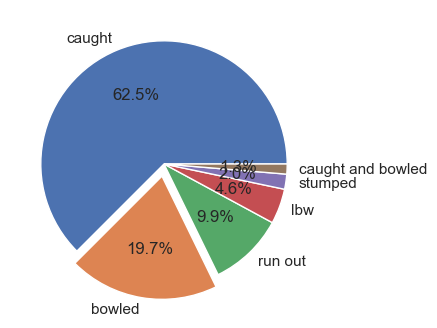

In [135]:
fig,ax = plt.subplots(figsize=(4,4), dpi = 100)
times = [95,30,15,7,3,2]
kind = ['caught','bowled','run out','lbw','stumped','caught and bowled']
explode = [0,0.1,0,0,0,0]
plt.pie(times, labels=kind, autopct='%1.1f%%',explode = explode);

In [136]:
len(df_kohli[df_kohli['batsman_runs']==4])

482

In [137]:
len(df_kohli[df_kohli['batsman_runs']==6])

191

### Distribution of runs scored by Virat Kohli

In [138]:
# Total runs scored by Virat Kohli
df_kohli.groupby('batsman')['batsman_runs'].sum()

batsman
V Kohli    5434
Name: batsman_runs, dtype: int64

In [139]:
def run_count(df,runs):
    return len(df_kohli[df_kohli['batsman_runs']==runs]) * runs

In [140]:
run_count(df_kohli,1)

1741

In [141]:
run_count(df_kohli,2)

586

In [142]:
run_count(df_kohli,3)

33

In [143]:
run_count(df_kohli,4)

1928

In [144]:
run_count(df_kohli,6)

1146

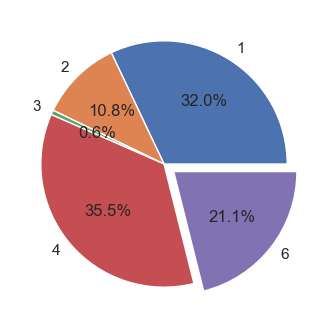

In [145]:
fig,ax = plt.subplots(figsize=(4,4), dpi = 100)
runs = [1741,586,33,1928,1146]
types = ['1','2','3','4','6']
explodes = [0,0,0,0,0.1]
plt.pie(runs, labels=types, autopct='%1.1f%%', explode=explodes);

In [146]:
df_kohli2 = matches[['id','season']].merge(deliveries, left_on='id', right_on='match_id', how='left')

In [147]:
df_kohli2.drop('id', axis=1, inplace=True)
df_kohli2.head()

season  match_id  inning batting_team bowling_team  over  ball    batsman  \
0    2017         1       1          SRH          RCB     1     1  DA Warner   
1    2017         1       1          SRH          RCB     1     2  DA Warner   
2    2017         1       1          SRH          RCB     1     3  DA Warner   
3    2017         1       1          SRH          RCB     1     4  DA Warner   
4    2017         1       1          SRH          RCB     1     5  DA Warner   

  non_striker    bowler  ...  bye_runs  legbye_runs  noball_runs  \
0    S Dhawan  TS Mills  ...         0            0            0   
1    S Dhawan  TS Mills  ...         0            0            0   
2    S Dhawan  TS Mills  ...         0            0            0   
3    S Dhawan  TS Mills  ...         0            0            0   
4    S Dhawan  TS Mills  ...         0            0            0   

   penalty_runs  batsman_runs  extra_runs  total_runs  player_dismissed  \
0             0             0           0           0               NaN   
1             0             0           0           0               NaN   
2             0             4           0           4               NaN   
3             0             0           0           0               NaN   
4             0             0           2           2               NaN   

   dismissal_kind fielder  
0             NaN     NaN  
1             NaN     NaN  
2             NaN     NaN  
3             NaN     NaN  
4             NaN     NaN  

[5 rows x 22 columns]

In [148]:
df_kohli = df_kohli2[df_kohli2['batsman']=='V Kohli']

In [149]:
df_kohli.head()

season  match_id  inning batting_team bowling_team  over  ball  batsman  \
2590    2017        12       1          RCB           MI     1     2  V Kohli   
2591    2017        12       1          RCB           MI     1     3  V Kohli   
2593    2017        12       1          RCB           MI     1     5  V Kohli   
2594    2017        12       1          RCB           MI     1     6  V Kohli   
2597    2017        12       1          RCB           MI     2     1  V Kohli   

     non_striker           bowler  ...  bye_runs  legbye_runs  noball_runs  \
2590    CH Gayle       TG Southee  ...         0            0            0   
2591    CH Gayle       TG Southee  ...         0            0            0   
2593    CH Gayle       TG Southee  ...         0            0            0   
2594    CH Gayle       TG Southee  ...         0            0            0   
2597    CH Gayle  Harbhajan Singh  ...         0            0            0   

      penalty_runs  batsman_runs  extra_runs  total_runs  player_dismissed  \
2590             0             0           1           1               NaN   
2591             0             1           0           1               NaN   
2593             0             0           0           0               NaN   
2594             0             1           0           1               NaN   
2597             0             0           0           0               NaN   

      dismissal_kind fielder  
2590             NaN     NaN  
2591             NaN     NaN  
2593             NaN     NaN  
2594             NaN     NaN  
2597             NaN     NaN  

[5 rows x 22 columns]

In [150]:
df_kohli.groupby('season')['batsman_runs'].sum()

season
2008    165
2009    246
2010    307
2011    557
2012    364
2013    639
2014    359
2015    505
2016    973
2017    308
2018    539
2019    472
Name: batsman_runs, dtype: int64

In [151]:
df_kohli.groupby('season')['batsman_runs'].sum().iplot()

## Season Wise Individual Batsman Stats

In [152]:
batsmanstats = matches[['id','season']].merge(deliveries, left_on = 'id', right_on='match_id', how='inner')

In [153]:
batsmanstats.drop('match_id', axis=1, inplace=True)

In [154]:
batsmanstats.head(1)

id  season  inning batting_team bowling_team  over  ball    batsman  \
0   1    2017       1          SRH          RCB     1     1  DA Warner   

  non_striker    bowler  ...  bye_runs  legbye_runs  noball_runs  \
0    S Dhawan  TS Mills  ...         0            0            0   

   penalty_runs  batsman_runs  extra_runs  total_runs  player_dismissed  \
0             0             0           0           0               NaN   

   dismissal_kind fielder  
0             NaN     NaN  

[1 rows x 22 columns]

In [155]:
batsmanscores = batsmanstats.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()

In [156]:
batsmanscores.head(5)

season   batsman  batsman_runs
0    2008  A Chopra            42
1    2008  A Kumble            13
2    2008  A Mishra            37
3    2008  A Mukund             0
4    2008   A Nehra             3